In [146]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

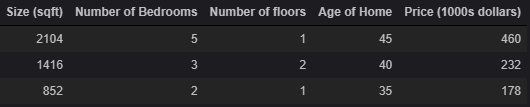 

In [147]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [148]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [149]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


### Single Prediction using vectorization

In [150]:
def predict(x, w, b):
    p = np.dot(x, w) + b     
    return p    

In [151]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


### Compute Cost with Multiple Variables 

In [152]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost /= 2*m
    return cost

In [153]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


### Gradient Descent with Multiple Variables 
  repeat until convergence: { $$ w_{j} = w_{j} - \alpha \frac {\partial J(w,b)}{\partial w_{j}} $$ <center> for j = 0..n-1 </center> <br> $$ b = b - \alpha \frac {\partial J(w,b)}{\partial b} $$ } <br>
where, n is the number of features, parameters $ w_{j}, b $ are updated simultaenously and where <br> $$ \frac {\partial J(w,b)}{\partial w_{j}} = \frac {1}{m} \displaystyle\sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)})x_{j}^{(i)} $$ 
$$ \frac {\partial J(w,b)}{\partial b} = \frac {1}{m} \displaystyle\sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)}) $$ 

* m is the number of training examples
* $ f_{w,b}(x^{(i)}) $ is the model's prediction, while $ y^{(i)} $ is the target value

### Compute Gradient

In [154]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    
    return dj_db, dj_dw

In [155]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b:  {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b:  [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


### Gradient Descent

In [156]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(X,y,w,b))
        
        if i%math.ceil(num_iters/10) == 0:
            print(f'Iteration{i:4d}: Cost {J_history[-1]:8.2f}')
    
    return w,b, J_history

In [157]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration   0: Cost  2529.46
Iteration 100: Cost   695.99
Iteration 200: Cost   694.92
Iteration 300: Cost   693.86
Iteration 400: Cost   692.81
Iteration 500: Cost   691.77
Iteration 600: Cost   690.73
Iteration 700: Cost   689.71
Iteration 800: Cost   688.70
Iteration 900: Cost   687.69
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178
